<a href="https://colab.research.google.com/github/ehom/colab_notebooks/blob/main/CNN-in-TensorFlow/C2_W4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Click the button on top that says, `Open in Colab`, to run this notebook as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

In [12]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [17]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 162MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 133MB/s]


In [41]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion

  with open(filename) as training_file:
    ### START CODE HERE
    data = list(csv.reader(training_file))
    data = np.array(data)
    # drop column headers (first row)
    data = np.delete(data, (0), axis=0)
    labels = data[:,0].astype(int)
    # print(labels)
    data = np.delete(data, 0, 1)
    data = data.astype(float)
    # Covert each row into a 28x28 matrix of pixels
    images = np.array([
        np.array_split(row, 28) for row in data
    ])

    ### END CODE HERE
  return images, labels


training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

print(np.min(training_labels), np.max(training_labels))
print(np.min(testing_labels), np.max(testing_labels))

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)
0 24
0 24


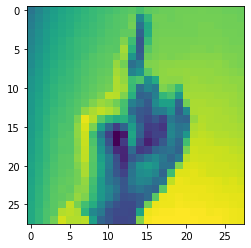

3


In [47]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.imshow(training_images[0], interpolation='nearest')
plt.show()

print(training_labels[0])

In [19]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(training_images, training_labels, batch_size=20)

validation_datagen = ImageDataGenerator(
    # Your Code Here
    ImageDataGenerator(rescale = 1./255)
)

validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size=20)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [15]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D

model = tf.keras.models.Sequential([
    # Your Code Here
    # Note the input shape is the desired size of the image 28x28 with 1 byte color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    ### YOUR CODE HERE
    # loss = 'categorical_crossentropy',
    loss = 'sparse_categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(
    # Your Code Here (set 'epochs' = 2)
    train_generator,
    epochs = 2,
    validation_data = validation_generator
)

model.evaluate(testing_images, testing_labels)

# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]


Epoch 1/2
1372/1373 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0410

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1373/1373 [==============================] - 22s 15ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0462
Epoch 2/2
225/225 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0462


[nan, 0.04615170136094093]

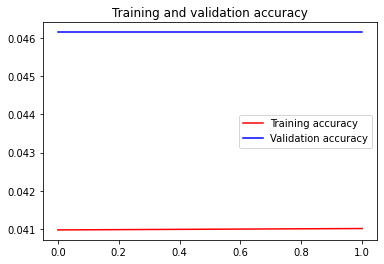

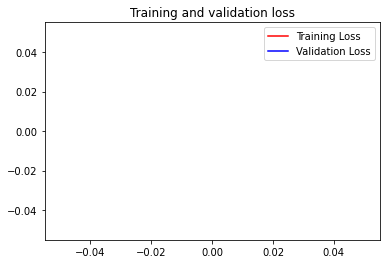

In [16]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()